<a href="https://colab.research.google.com/github/chasuar/Raspberry_study/blob/main/4_Opecv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt

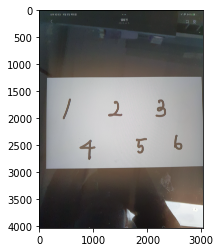

In [ ]:
img=cv2.imread('/content/drive/MyDrive/창의적종합설계 2분반/opencv_test.jpg')
plt.imshow(img)

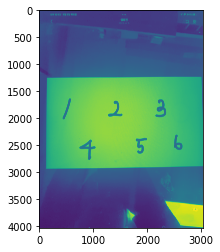

In [ ]:
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

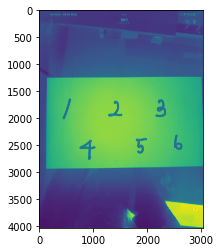

In [ ]:
img_blur=cv2.GaussianBlur(img_gray,(5,5),0)
plt.imshow(img_blur)

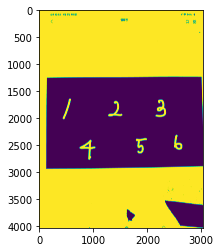

In [ ]:
ret, img_th=cv2.threshold(img_blur, 0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt.imshow(img_th)


In [ ]:
contours, hierachy=cv2.findContours(img_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rects=[cv2.boundingRect(each) for each in contours]

In [ ]:
rects

[(1591, 4023, 47, 9),
 (1604, 4010, 21, 10),
 (2556, 3900, 2, 5),
 (2551, 3897, 3, 3),
 (2450, 3539, 1, 1),
 (746, 2401, 295, 370),
 (1785, 2368, 207, 286),
 (2489, 2308, 156, 279),
 (3023, 2198, 1, 4),
 (3023, 2178, 1, 5),
 (3023, 2159, 1, 2),
 (1275, 1681, 263, 288),
 (2148, 1654, 197, 325),
 (436, 1638, 155, 381),
 (0, 0, 3024, 4032)]

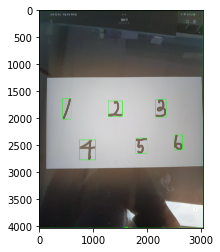

In [ ]:
img_c=img.copy()
for rect in rects:
     cv2.rectangle(img_c, (rect[0], rect[1]), 
                  (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 5) 

plt.imshow(img_c)

In [ ]:
tmp=(w*h for (x,y,w,h) in rects)
tmp=sorted(tmp)
tmp

[1,
 2,
 4,
 5,
 9,
 10,
 210,
 423,
 43524,
 59055,
 59202,
 64025,
 75744,
 109150,
 12192768]

In [ ]:
rects=[(x,y,w,h) for (x, y, w,h) in rects if ((w*h>10000) and (w*h <200000))]
rects

[(746, 2401, 295, 370),
 (1785, 2368, 207, 286),
 (2489, 2308, 156, 279),
 (1275, 1681, 263, 288),
 (2148, 1654, 197, 325),
 (436, 1638, 155, 381)]

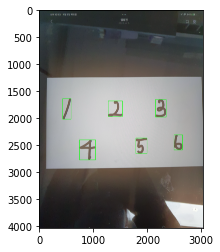

In [ ]:
img_c=img.copy()
for rect in rects:
     cv2.rectangle(img_c, (rect[0], rect[1]), 
                  (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 5) 

plt.imshow(img_c)

In [ ]:
plus=100
img_class=[]
img_for_class=img_blur.copy()
for rect in rects:
    img_class.append(img_for_class[rect[1]-plus : rect[1]+rect[3]+plus, rect[0]-plus : rect[0]+rect[2]+plus])

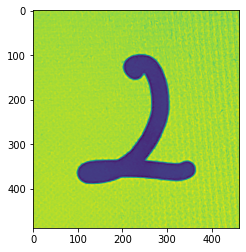

In [ ]:
plt.imshow(img_class[3])

In [ ]:
import numpy as np
#img_class 0번째 변수
img_test=img_class[0]
# 사이즈 변경
img_test=cv2.resize(img_test,(28,28))
img_test=np.array(img_test)
# 색상 맞추기
img_test=255-img_test
for x in img_test:
  num_str=""
  for i in x:
    num_str=num_str+str(i)+"\t"
  print(num_str)

61	61	60	58	55	55	54	55	52	55	51	49	51	54	54	48	47	47	50	44	45	47	46	45	45	46	43	44	
62	61	60	61	58	58	56	55	54	54	52	55	55	51	51	49	50	51	49	46	46	46	47	45	42	45	43	45	
59	57	63	59	58	58	56	56	53	53	52	54	54	49	49	54	53	52	47	47	49	48	45	45	44	45	44	42	
61	62	57	59	59	53	53	57	54	53	55	54	53	49	51	52	54	48	49	50	48	48	45	45	43	48	43	43	
63	60	62	60	59	54	56	55	56	53	54	52	51	53	53	54	50	52	50	51	50	46	45	46	48	45	44	43	
64	63	61	59	58	59	55	58	57	55	53	53	51	54	53	48	151	150	45	52	46	48	46	47	45	47	45	45	
63	61	58	60	65	58	56	57	56	57	56	54	55	59	40	151	151	153	46	47	48	48	48	46	46	48	47	46	
63	59	61	60	62	60	56	56	57	62	57	55	55	120	153	153	151	158	50	47	48	48	48	47	45	46	48	48	
65	65	62	59	59	58	57	60	60	59	56	47	151	151	151	156	153	153	53	49	49	45	46	47	47	47	47	46	
64	65	61	60	60	59	58	60	59	56	164	153	149	153	53	156	152	154	54	50	51	51	49	50	48	48	51	51	
64	63	62	62	60	57	58	62	153	153	151	154	90	59	56	157	155	149	52	49	48	48	52	49	48	50	49	45	
68	63	62	60	60	54	157	154	154	153	1

In [ ]:
img_test=img_test/255.0

In [ ]:
img_test=img_test.reshape((1,28,28,1))
img_test.shape

(1, 28, 28, 1)

In [ ]:
from keras.models import load_model

In [ ]:
model=load_model('/content/drive/MyDrive/창의적종합설계 2분반/Predict_Model.h5')

In [ ]:
predict=model.predict_on_batch(img_test)
mypred=np.argmax(predict, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


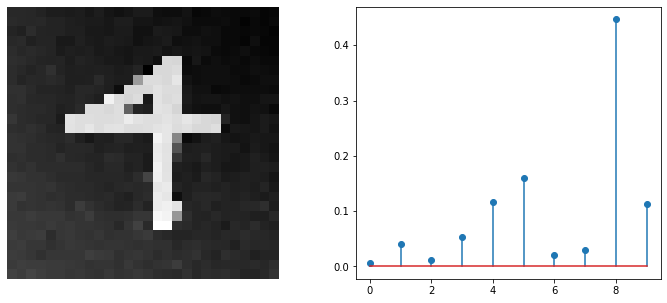

Prediction : 8


In [ ]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.imshow(img_test.reshape(28, 28), 'gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.stem(predict[0])
plt.show()

print('Prediction : {}'.format(mypred[0]))

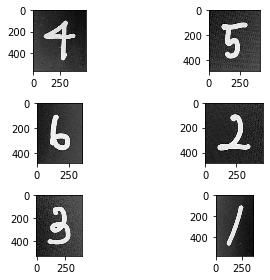

In [ ]:
count=0
for n in img_class:
  count=count+1
  plt.subplot(3,2, count)
  plt.imshow(n, cmap='Greys', interpolation='nearest')

plt.tight_layout()
plt.show()

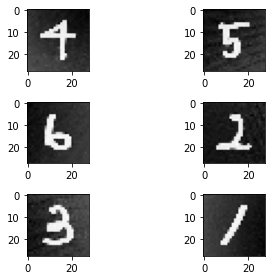

In [ ]:
count=0
for n in img_class:
  count=count+1
  plt.subplot(3, 2, count)
  plt. imshow(cv2.resize(n,(28,28)), cmap='Greys')

plt.tight_layout()
plt.show()

In [ ]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/창의적종합설계/2주차/Predict_Model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


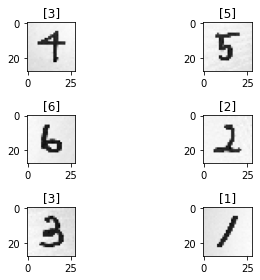

In [ ]:
count=0
for n in img_class:
  count=count+1
  plt.subplot(3, 2, count)
  test=cv2.resize(n,(28,28))
  test=255-test
  test=test/255.0
  plt.imshow(test,cmap='Greys')
  test=test.reshape((1,28,28,1))
  predict=model.predict_on_batch(test)
  mypred=np.argmax(predict, axis=1)
  plt.title(mypred)


plt.tight_layout()
plt.show()

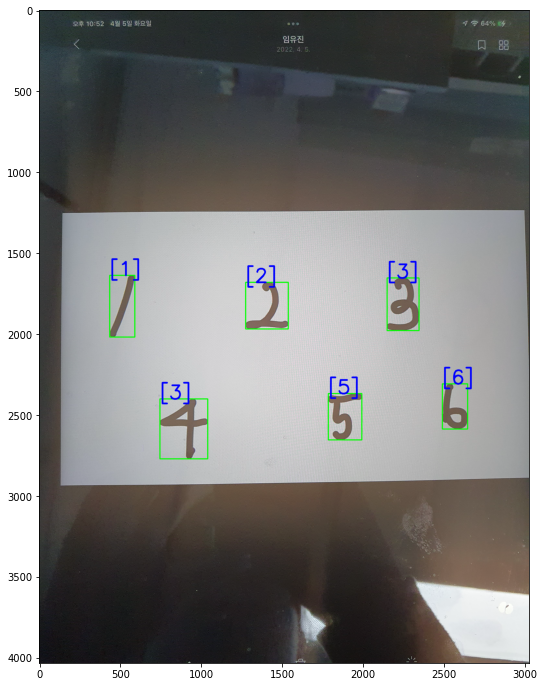

In [64]:
img_result=[]
img_for_class=img_blur.copy()
count=0
plus=100

for rect in rects:
          img_result=img_for_class[rect[1]-plus : rect[1]+rect[3]+plus, rect[0]-plus : rect[0]+rect[2]+plus]
          test=cv2.resize(img_result,(28,28))

          test=255-test
          test=test/255.0
          test=test.reshape((1,28,28,1))
          predict=model.predict_on_batch(test)
          mypred=np.argmax(predict, axis=1)


          #사각형 그리기
          cv2.rectangle(img, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 5) 
          font=cv2.FONT_HERSHEY_SIMPLEX
          cv2.putText(img, str(mypred),(rect[0],rect[1]),font, 4, (0,0,255),10)
plt.figure(figsize=(15,12))
plt.imshow(img)